# Area Between Curves and Application to Equality

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from scipy.integrate import quad

### Example 2: NYC Salary Data

The data below comes from [NYC Open Data](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e). 

-----

*Data is collected because of public interest in how the City’s budget is being spent on salary and overtime pay for all municipal employees. Data is input into the City's Personnel Management System (“PMS”) by the respective user Agencies. Each record represents the following statistics for every city employee: Agency, Last Name, First Name, Middle Initial, Agency Start Date, Work Location Borough, Job Title Description, Leave Status as of the close of the FY (June 30th), Base Salary, Pay Basis, Regular Hours Paid, Regular Gross Paid, Overtime Hours worked, Total Overtime Paid, and Total Other Compensation (i.e. lump sum and/or retro payments). This data can be used to analyze how the City's financial resources are allocated and how much of the City's budget is being devoted to overtime. The reader of this data should be aware that increments of salary increases received over the course of any one fiscal year will not be reflected. All that is captured, is the employee's final base and gross salary at the end of the fiscal year*

-----

In [2]:
#!pip install sodapy

In [3]:
from sodapy import Socrata

client = Socrata("data.cityofnewyork.us", None)

results = client.get("k397-673e", limit=10000)


last_year_salaries = pd.DataFrame.from_records(results)

In [4]:
last_year_salaries['fiscal_year'].describe()

count     10000
unique        2
top        2022
freq       8518
Name: fiscal_year, dtype: object

In [5]:
last_year_salaries[last_year_salaries['fiscal_year'] == '2022'].shape

(8518, 17)

In [6]:
last_year_salaries = last_year_salaries[last_year_salaries['fiscal_year'] == '2022']

In [7]:
last_year_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8518 entries, 0 to 8517
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fiscal_year                 8518 non-null   object
 1   payroll_number              8518 non-null   object
 2   agency_name                 8518 non-null   object
 3   last_name                   8518 non-null   object
 4   first_name                  8518 non-null   object
 5   mid_init                    5792 non-null   object
 6   agency_start_date           8518 non-null   object
 7   work_location_borough       8518 non-null   object
 8   title_description           8518 non-null   object
 9   leave_status_as_of_july_31  8518 non-null   object
 10  base_salary                 8518 non-null   object
 11  pay_basis                   8518 non-null   object
 12  regular_hours               8518 non-null   object
 13  regular_gross_paid          8518 non-null   obje

In [8]:
last_year_salaries.head(2)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_july_31,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2022,67,ADMIN FOR CHILDREN'S SVCS,VISPO,ANDREA,M,2016-02-08T00:00:00.000,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ACTIVE,60327.00,per Annum,1503.00,49682.95,0.00,0.00,2184.22
1,2022,67,ADMIN FOR CHILDREN'S SVCS,FREEDMAN,NEIL,S,2014-12-08T00:00:00.000,MANHATTAN,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,ACTIVE,172309.00,per Annum,1820.00,180146.54,0.00,0.00,3204.80


In [9]:
last_year_salaries['base_salary'] = last_year_salaries['base_salary'].astype('float')

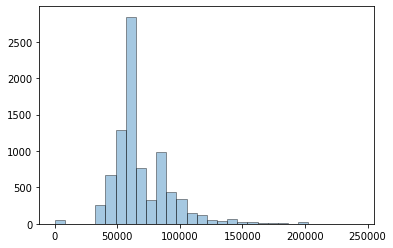

In [10]:
plt.hist(last_year_salaries['base_salary'], bins = 30, alpha = 0.4, edgecolor = 'black');

In [11]:
#!pip install sodapy

### Determining the Gini Coefficient

In [12]:
import pandas as pd
from sodapy import Socrata
client = Socrata("data.cityofnewyork.us", None)
results = client.get("k397-673e", limit=20000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [13]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fiscal_year                 20000 non-null  object
 1   payroll_number              20000 non-null  object
 2   agency_name                 20000 non-null  object
 3   last_name                   20000 non-null  object
 4   first_name                  20000 non-null  object
 5   mid_init                    13548 non-null  object
 6   agency_start_date           20000 non-null  object
 7   work_location_borough       20000 non-null  object
 8   title_description           20000 non-null  object
 9   leave_status_as_of_july_31  20000 non-null  object
 10  base_salary                 20000 non-null  object
 11  pay_basis                   20000 non-null  object
 12  regular_hours               20000 non-null  object
 13  regular_gross_paid          20000 non-null  ob

In [14]:
results_df['base_salary'] = results_df['base_salary'].astype('float')

<AxesSubplot: >

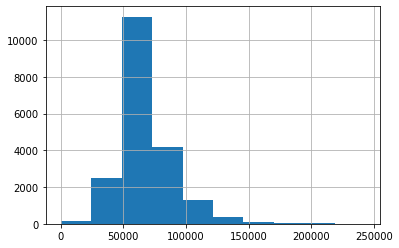

In [15]:
results_df['base_salary'].hist()

### Gini Coefficient

- Create deciles
- Plot the points
- Fit the curve
- Integrate

In [16]:
sorted_salaries = results_df['base_salary'].sort_values()

In [17]:
sorted_salaries.head()

16484    15.15
16713    15.50
16705    15.50
16693    15.50
16677    15.50
Name: base_salary, dtype: float64

In [18]:
sorted_salaries.describe()

count     20000.000000
mean      68341.975230
std       23533.994498
min          15.150000
25%       55125.000000
50%       60327.000000
75%       82137.000000
max      243171.000000
Name: base_salary, dtype: float64

In [19]:
sorted_salaries[sorted_salaries > 1000].shape

(19832,)

In [20]:
sorted_salaries[:4000].sum()/sorted_salaries.sum()

<ipython-input-20-c1efb61990fa>:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sorted_salaries[:4000].sum()/sorted_salaries.sum()


0.12773523373623452

In [21]:
sorted_salaries[:8000].sum()/sorted_salaries.sum()

<ipython-input-21-a86cd48d0232>:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sorted_salaries[:8000].sum()/sorted_salaries.sum()


0.29768260445404165

In [22]:
sorted_salaries[:12000].sum()/sorted_salaries.sum()

<ipython-input-22-19898d33af5b>:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sorted_salaries[:12000].sum()/sorted_salaries.sum()


0.4756872744838283

In [23]:
sorted_salaries[:16000].sum()/sorted_salaries.sum()

<ipython-input-23-95769b7c03dd>:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sorted_salaries[:16000].sum()/sorted_salaries.sum()


0.6954554498907187

In [24]:
sorted_salaries[:20000].sum()/sorted_salaries.sum()

<ipython-input-24-d31bdeb765d3>:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sorted_salaries[:20000].sum()/sorted_salaries.sum()


1.0

In [25]:
percentiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
salary = [0, .13, .3, .48, .7, 1.0]

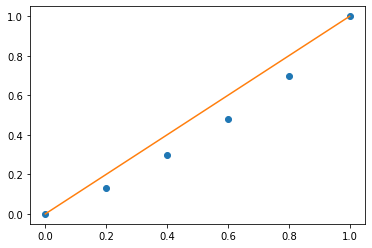

In [26]:
plt.plot(percentiles, salary, 'o')
plt.plot(percentiles, percentiles)

In [27]:
lorenz = np.polyfit(percentiles, salary, 2)
preds = np.polyval(lorenz, percentiles)

In [28]:
lorenz

array([0.46875   , 0.51553571, 0.00535714])

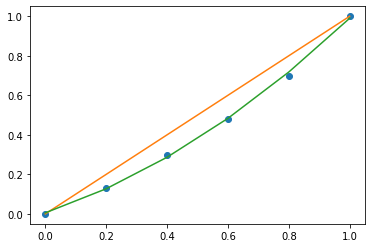

In [29]:
plt.plot(percentiles, salary, 'o')
plt.plot(percentiles, percentiles)
plt.plot(percentiles, preds)

In [30]:
lorenz

array([0.46875   , 0.51553571, 0.00535714])

In [31]:
def l(x):
  '''
  This function uses the coefficients
  learned above to define a Lorenz curve
  '''
  return 0.46*x**2 + 0.52*x + 0.005

In [32]:
def gini(x):
  '''
  Using the Lorenz curve
  we define our gini coef.
  '''
  return x - l(x)

In [33]:
#integrate and determine
# the gini coefficient
2*quad(gini, 0, 1)[0]

0.16333333333333327

### Thomas Piketty and Capital



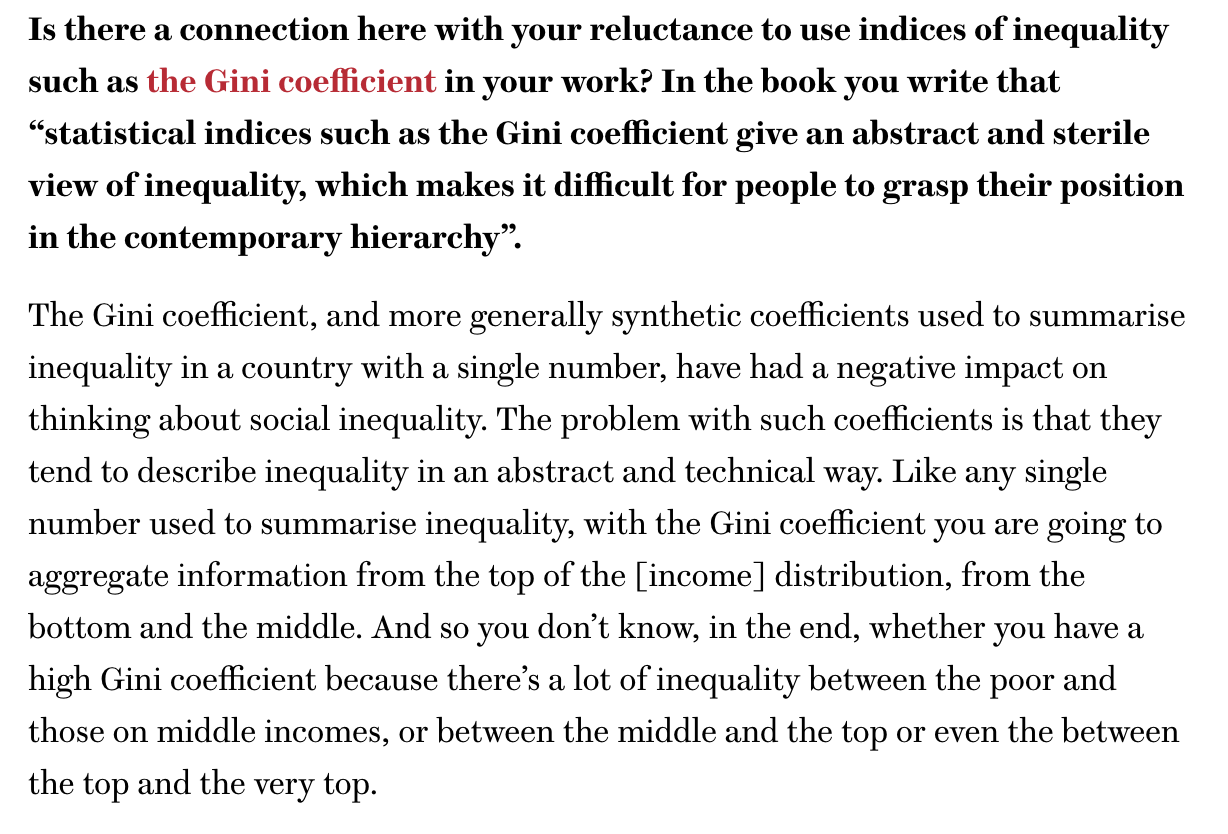

Let's head over to the world inequality database to explore some basic data.  We begin by examining Canadian pre-tax income distribution. [Link](https://wid.world/data/)

In [34]:
canada_2019 = pd.DataFrame({'percent': [0.0, 0.5, 0.9, 1.0], 'income': [0, 0.18, .423, .39]})

In [35]:
canada_2019

,percent,income
0,0.0,0.000
1,0.5,0.180
2,0.9,0.423
3,1.0,0.390


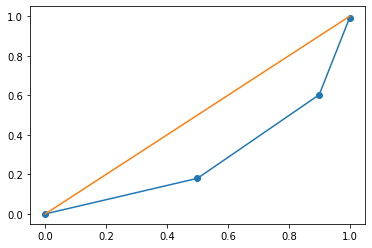

In [36]:
plt.plot([0, 0.5, 0.9, 1.0], np.cumsum(canada_2019['income']), '-o')
plt.plot([0, 1], [0, 1])